In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import scipy as sci
import statistics as stats

In [139]:
# Load data
runs = [1, 2, 3]
regions = ['center', 'midinner', 'midouter', 'interface']
# regions = ['bulk', 'center', 'midinner', 'midouter', 'interface']

# Dictionary to store the DataFrames
rdf_data = {}
coordno = {}

# Load each rdf and coordno file per run per region
for region in regions:
    for run in runs:
        path = f'./data/Run{run}/analysis_results/{region}_rdf.csv'
        rdf_data[(run, region)] = pd.read_csv(path)


for region in regions:
    for run in runs:
        path = f'./data/Run{run}/analysis_results/{region}_coordno.csv'
        coordno[(run, region)] = pd.read_csv(path)



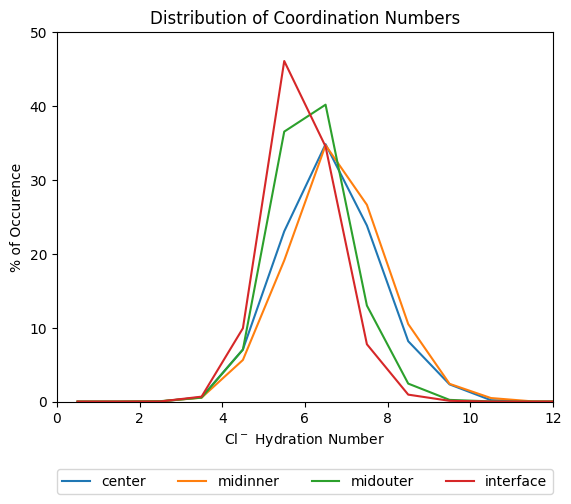

In [144]:
# Calculate average coordination numbers across runs
regions = ['center', 'midinner', 'midouter', 'interface']

coord_distr={}
coord_dist_avg = {}

for region in regions:
    
    all_runs_data = []
    
    for run in runs:
        coord_distr[(run, region)] = []  # Initialize dictionary entry
        
        data = coordno[(run, region)]  # Ensure proper tuple indexing
        
        total_frames = len(data)

        # Compute histogram binning 
        counts, bins = np.histogram(data, bins=range(0, 14, 1))  # Compute histogram
        
        percentage = (counts / total_frames) * 100  # Convert counts to percentage
        
        bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers
        
        # Store percentage values in the dictionary
        coord_distr[(run, region)].extend(percentage)
        
        all_runs_data.append(percentage)
    
    # Calculate averages per region
    coord_dist_avg[region] = np.mean(all_runs_data, axis=0) if all_runs_data else None


# Plot per region 
for region in regions:
    plt.plot(bin_centers, coord_dist_avg[region], label=f'{region}')
    
plt.xlabel('Cl${^-}$ Hydration Number')
plt.ylabel('% of Occurence')
plt.title('Distribution of Coordination Numbers')
plt.xlim (0,12)
plt.ylim (0,50)
plt.xticks(range(0,13,2))  # Set x-axis ticks to whole numbers
plt.legend( bbox_to_anchor=(0, -0.25, 1,1 ),loc='lower center',
       ncol=5, mode="expand", borderaxespad=0.)
plt.savefig('coordno_distr.pdf',bbox_inches='tight')

The coordination numbers were obtained by evaluating the cumulative ion-oxygen RDFs up to the first minimum, corresponding to the number of oxygens in the first
hydration shell. The plot above demonstrates with mean-field polarisation applied through the Electronic Continuum Correction (ECC), Cl$-$ partially dehydrates/ loses a water molecule when in proximity to the hydrophobic pore wall (interface) compared with more bulk-like regions (center). 
